In [82]:
import numpy as np
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.cluster import KMeans

%matplotlib inline

# 1 

<img src = '1.jpeg'>
<img src = '2.jpeg'>
<img src = '3.jpeg'>

# 2

<img src = '4.jpeg'>

# 3
<img src = '5.jpeg'>

# 4

<img src = '5b.jpeg'>

# 5 
<img src = '6.jpeg'>

# 6 
<img src = '6b.jpeg'>

## `eigsort.m`

In [83]:
# [Vsort,Dsort] = eigsort(V, eigvals)
#
# Sorts a matrix eigenvectors and a array of eigenvalues in order 
# of eigenvalue size, largest eigenvalue first and smallest eigenvalue
# last.
#
# Example usage:
# di, V = np.linarg.eig(L)
# Vnew, Dnew = eigsort(V, di)
#
# Tim Marks 2002

In [84]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

## `spectclust.m`

In [85]:
# refs
# [1]	Shi, J., and J. Malik (1997) "Normalized Cuts and Image Segmentation",
# 	in Proc. of IEEE Conf. on Comp. Vision and Pattern Recognition, 
# 	Puerto Rico.

# [2]	Kannan, R., S. Vempala, and A. Vetta (2000) "On Clusterings - Good, Bad %%	and Spectral", Tech. Report, CS Dept., Yale University.

# This code is from ref [3] 
# [3]	Ng, A. Y., M. I. Jordan, and Y. Weiss (2001) "On Spectral Clustering:
#  	Analysis and an algorithm", in Advances in Neural Information Processing%%	Systems 14.


# [4]	Weiss, Y. (1999) "Segmentation using eigenvectors: a unifying view", 
# 	Tech. Rep., CS. Dept., UC Berkeley.

In [86]:
#For question 9 uncomment this code to make your own random data of the same form
r1 = 5
r2 = 10
set1 = np.random.uniform(low=0,high=2*np.pi,size=(1,20))
set2 = np.random.uniform(low=0,high=2*np.pi,size=(1,30))
d1 = np.vstack((r1*np.cos(set1),r1*np.sin(set1)))
d2 = np.vstack((r2*np.cos(set2),r2*np.sin(set2)))

In [87]:
# # For question 9 comment out the next 3 lines
# allpts = sio.loadmat('HW3.mat')['allpts']
# d1 = allpts[0:20].T
# d2 = allpts[20:50].T

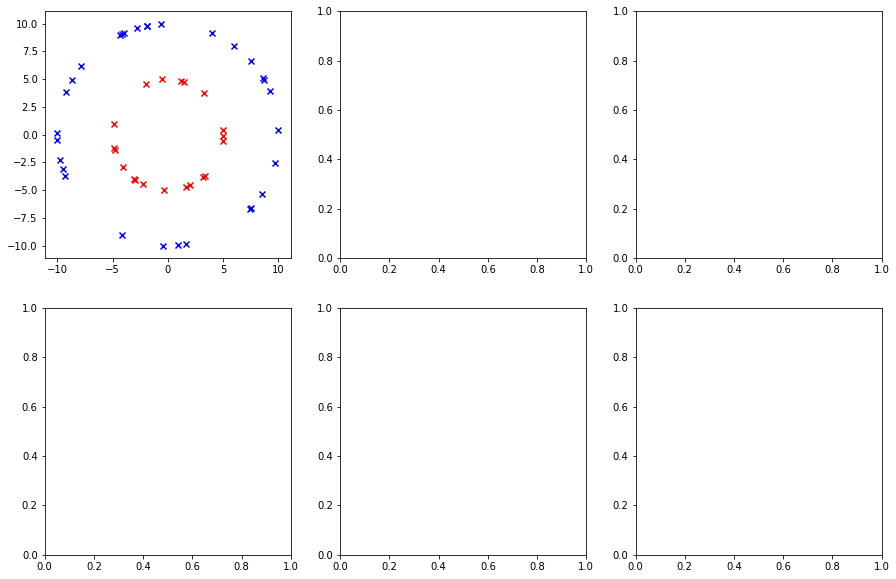

In [109]:
fig, axes = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(15)

ax = axes[0,0]
ax.scatter(d1[0,:], d1[1,:], c='r', marker='x')
ax.scatter(d2[0,:], d2[1,:], c='b', marker='x')

cluster1 = d1.T
cluster2 = d2.T

allpts = np.vstack((cluster1, cluster2))
goto = np.shape(allpts)[0]

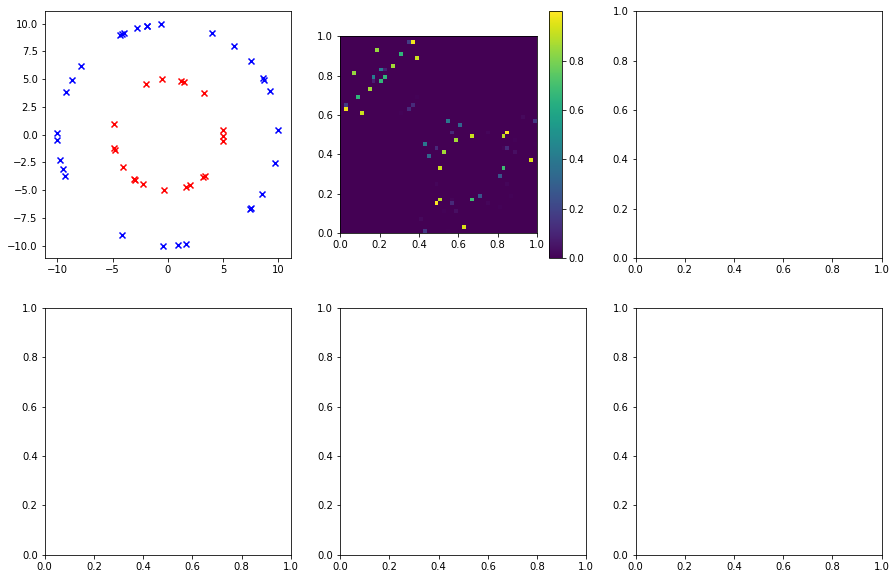

In [110]:
# compute A (step 1)
# experiment with sigsq in question 8
sigsq = .2
Aisq = np.power(allpts[:,0], 2) + np.power(allpts[:,1], 2)
Dotprod = allpts.dot(allpts.T)

distmat = - repmat(Aisq, goto, 1) - repmat(Aisq.reshape(-1,1), 1, goto)  + 2*Dotprod
Afast = np.exp(distmat / (2*sigsq))
A = Afast - np.diag(np.diag(Afast))

ax = axes[0,1]
im = ax.imshow(A, extent=[0, 1, 0, 1])
fig.colorbar(im, ax=ax)
fig

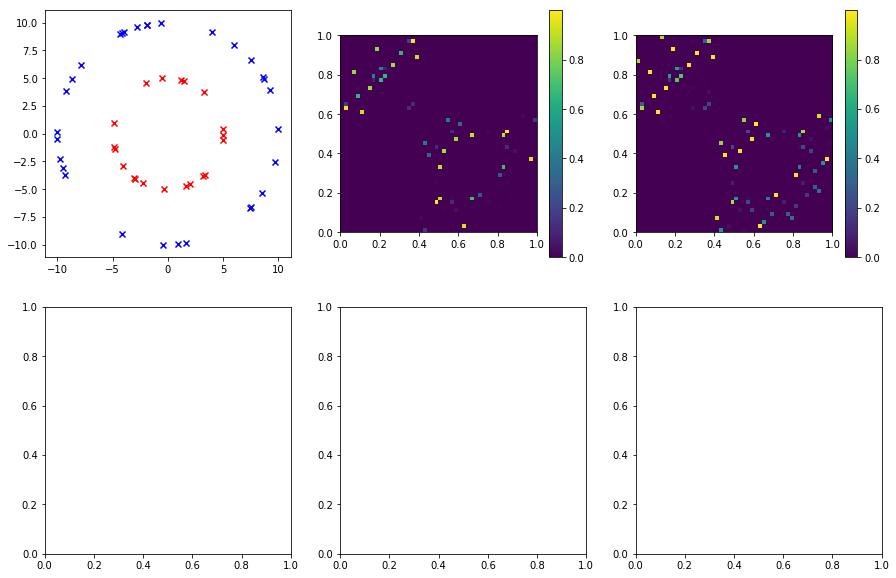

In [111]:
# step 2
D = np.diag(np.sum(A.T, axis=0))
L = np.linalg.inv(np.sqrt(D)).dot(A).dot(np.linalg.inv(np.sqrt(D)))
ax = axes[0,2]
im = ax.imshow(L, extent=[0, 1, 0, 1])
fig.colorbar(im, ax=ax)
fig

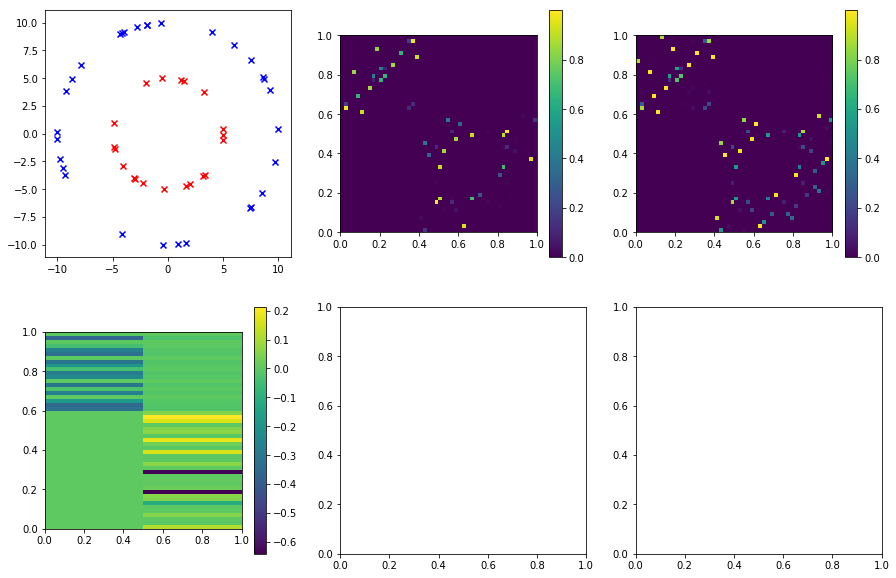

In [112]:
# step 3 
di, X = np.linalg.eig(L)
Xsort, Dsort = eigsort(X,di)
Xuse = Xsort[:, :2]
ax = axes[1,0]
im = ax.imshow(Xuse, extent=[0, 1, 0, 1])
fig.colorbar(im, ax=ax)
fig

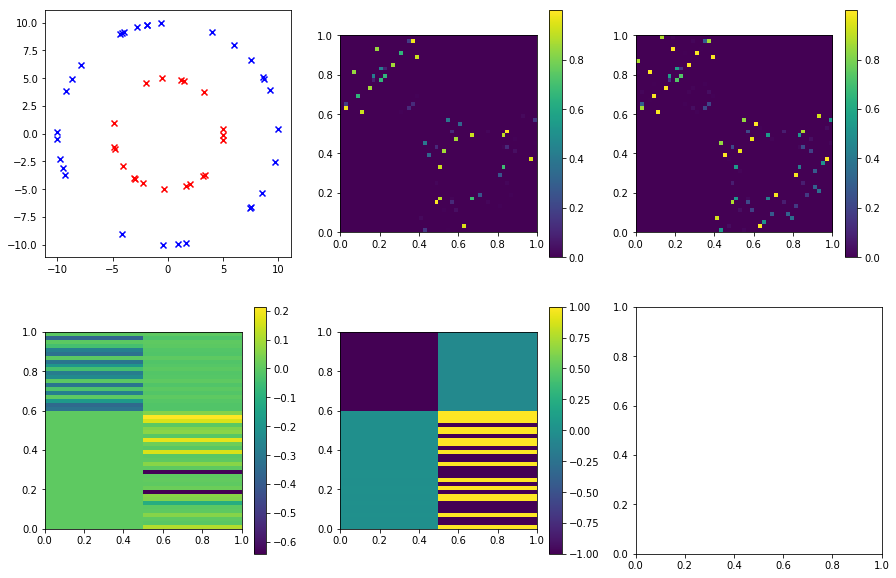

In [113]:
# normalize X to get Y (step 4)
Xsq = np.multiply(Xuse, Xuse)
divmat = repmat(np.sqrt(np.sum(Xsq.T, axis=0)).reshape(-1,1), 1, 2)
Y = np.divide(Xuse, divmat)
ax = axes[1,1]
im = ax.imshow(Y, extent=[0, 1, 0, 1])
fig.colorbar(im, ax=ax)
fig

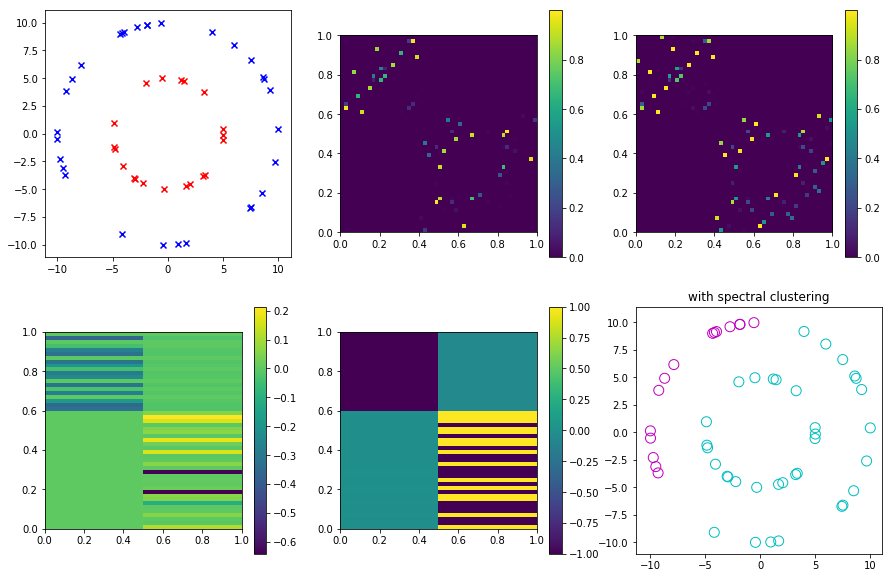

In [114]:
# step 5/6
kmeans = KMeans(n_clusters=2).fit(Y)
kk = kmeans.labels_
c1 = np.argwhere(kk == 0)
c2 = np.argwhere(kk == 1)
ax = axes[1,2]
ax.scatter(allpts[c1][:,0][:,0], allpts[c1][:,0][:,1], edgecolor='c', marker='o', facecolor='none', s=100)
ax.scatter(allpts[c2][:,0][:,0], allpts[c2][:,0][:,1], edgecolor='m', marker='o', facecolor='none', s=100)
ax.set_title('with spectral clustering')
fig

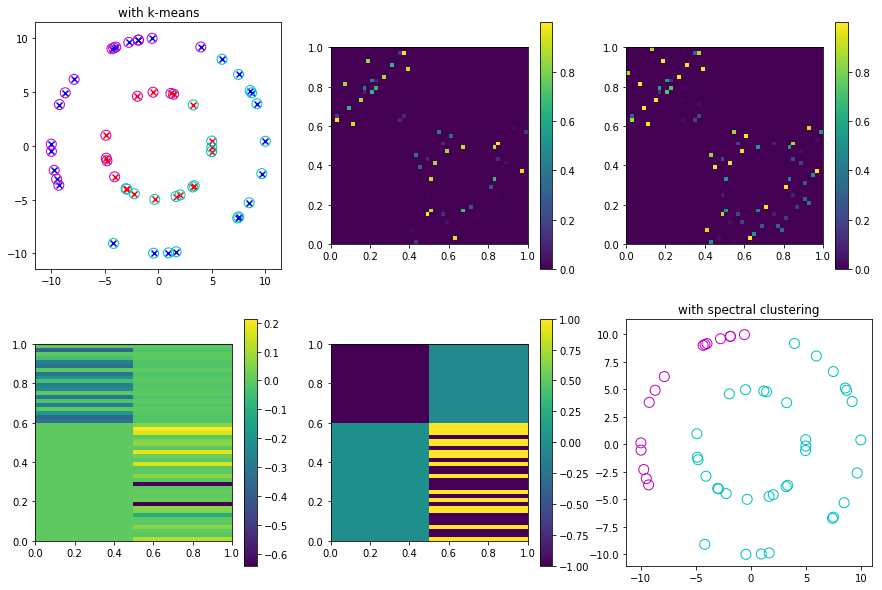

In [115]:
# For comparison run kmeans on original data
kmeans = KMeans(n_clusters=2).fit(allpts)
kk = kmeans.labels_
c1 = np.argwhere(kk == 0)
c2 = np.argwhere(kk == 1)
ax = axes[0, 0]
ax.scatter(allpts[c1][:,0][:,0], allpts[c1][:,0][:,1], edgecolor='c', marker='o', facecolor='none', s=100)
ax.scatter(allpts[c2][:,0][:,0], allpts[c2][:,0][:,1], edgecolor='m', marker='o', facecolor='none', s=100)
ax.set_title('with k-means')
fig

# 7

The first subfigure shows the two data sets plotted, with red points in the inner ring and blue points in the outer.

The second one shows the similarity/affinity matrix.  Notice how this fills two quadrants.

The third one shows the normalized graph laplacian matrix.  The weights of the colors are now more evenly distributed.

The fourth one shows the top k eigenvalues.  

The fifth one shows the normalized version of the above.

The last subfigure shows the result of spectral clustering. The data seems to be clustered as desired.  

K means works not too bad.

# 8

Sigsq represents the variance.  Too low sigsq results in inaccurate clustering, with emphasis on one rather than another.  Too high, over 1, and the same thing happens but reverse emphasis.  

# 9 

Sigsq sometimes does not work well, as it will miss for example 4 points in the clustering algorithm, in which case I have to make it smaller.  Some data sets probably don't work well because the randomization of the data sometimes clumps points in certain areas.  